In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("netflix_customer_churn.csv")

In [3]:
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [4]:
# Checking how many rows and columns are in the dataset

In [5]:
print(f"there are {df.shape[0]} rows and {df.shape[1]} columns in this dataset")

there are 5000 rows and 14 columns in this dataset


In [6]:
# Checking the data types of each column

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

In [8]:
# Checking the missing or null values

In [9]:
df.isnull().sum()

customer_id               0
age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
region                    0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64

In [10]:
# Checking the duplicate records

In [11]:
df.duplicated().sum()

0

In [12]:
# checking the distribution of the target variable (churned) / count , percentage
# where 0 menas customer stayed and 1 means customer left

In [13]:
df['churned'].value_counts()

churned
1    2515
0    2485
Name: count, dtype: int64

In [14]:
df['churned'].value_counts(normalize=True) * 100

churned
1    50.3
0    49.7
Name: proportion, dtype: float64

<Axes: xlabel='churned'>

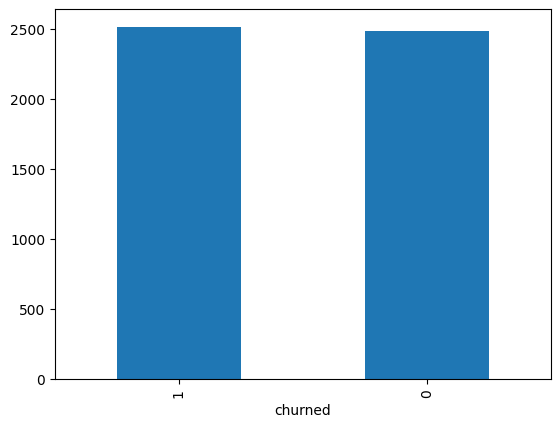

In [15]:
df['churned'].value_counts().plot(kind="bar")

In [16]:
# Checking the age distribution of customers

In [17]:
df['age'].describe()

count    5000.000000
mean       43.847400
std        15.501128
min        18.000000
25%        30.000000
50%        44.000000
75%        58.000000
max        70.000000
Name: age, dtype: float64

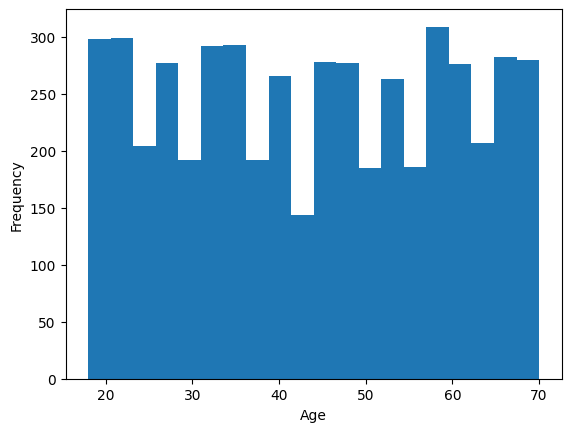

In [18]:
df['age'].plot(kind="hist",bins=20)
plt.xlabel("Age")
plt.show()

In [19]:
# Checking which age group churns the most
  # creating age group
  # calculating churn rate per age group

In [20]:
bins = [0,18,25,35,50,100]
labels = ["<18","18-25","26-35","36-50","50+"]

df["age_group"] = pd.cut(df["age"],bins=bins,labels=labels)

In [21]:
churn_by_age = (df.groupby('age_group')['churned'].mean()*100).round(2)
print("churn rate % by age group")
print(churn_by_age)

churn rate % by age group
age_group
<18      57.41
18-25    49.64
26-35    50.37
36-50    50.11
50+      50.24
Name: churned, dtype: float64


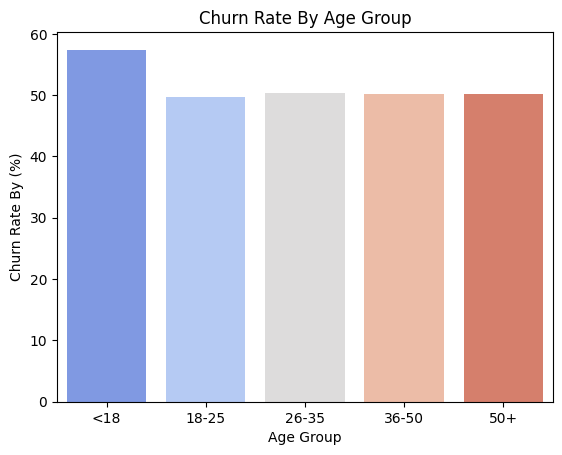

In [22]:
sns.barplot(churn_by_age,palette="coolwarm")
plt.title("Churn Rate By Age Group")
plt.xlabel("Age Group")
plt.ylabel("Churn Rate By (%)")
plt.show()

In [23]:
# Checking the churn differ by gender
 #checking count
 # checking rate

In [24]:
df.groupby("gender")["churned"].sum()

gender
Female    874
Male      827
Other     814
Name: churned, dtype: int64

In [25]:
differ_by_age = (df.groupby("gender")["churned"].mean()*100).round(2)
print(differ_by_age)

gender
Female    51.08
Male      50.00
Other     49.79
Name: churned, dtype: float64


<Axes: xlabel='gender', ylabel='churned'>

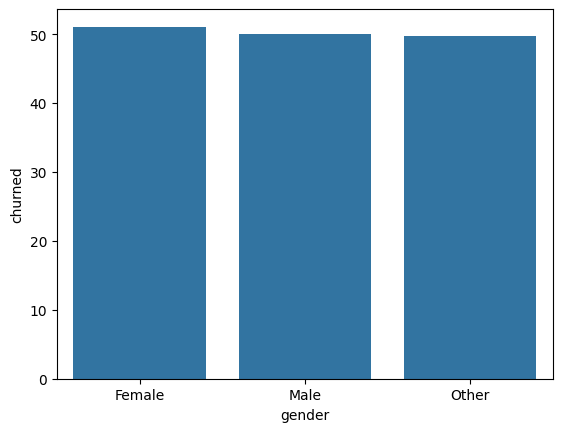

In [26]:
sns.barplot(differ_by_age)

In [27]:
# Checking that certain regions showing higher churn rates
 #checking Count
 #checking rate

In [28]:
df.groupby('region')['churned'].sum()

region
Africa           388
Asia             426
Europe           448
North America    421
Oceania          383
South America    449
Name: churned, dtype: int64

In [29]:
differ_by_region = (df.groupby('region')['churned'].mean()*100).round(2)
print(differ_by_region)

region
Africa           48.32
Asia             50.65
Europe           51.67
North America    49.47
Oceania          50.07
South America    51.43
Name: churned, dtype: float64


Text(0.5, 0, 'Churn Rate')

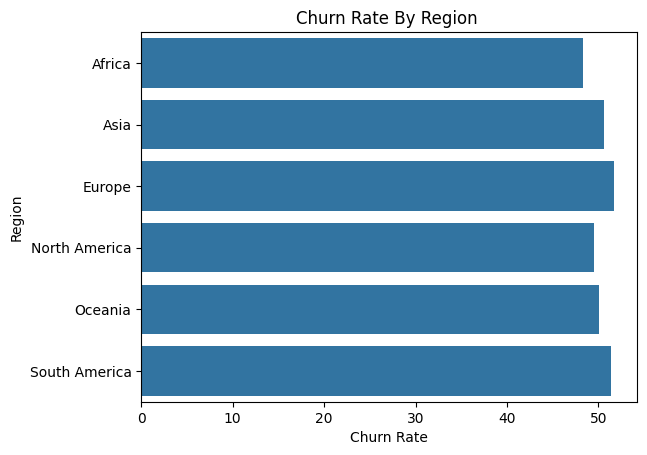

In [30]:
sns.barplot(differ_by_region,orient="h")
plt.title("Churn Rate By Region ")
plt.ylabel("Region")
plt.xlabel("Churn Rate")

In [31]:
# Checking how the watch_hours distributed

In [32]:
df['watch_hours'].describe()

count    5000.000000
mean       11.649450
std        12.014654
min         0.010000
25%         3.337500
50%         8.000000
75%        16.030000
max       110.400000
Name: watch_hours, dtype: float64

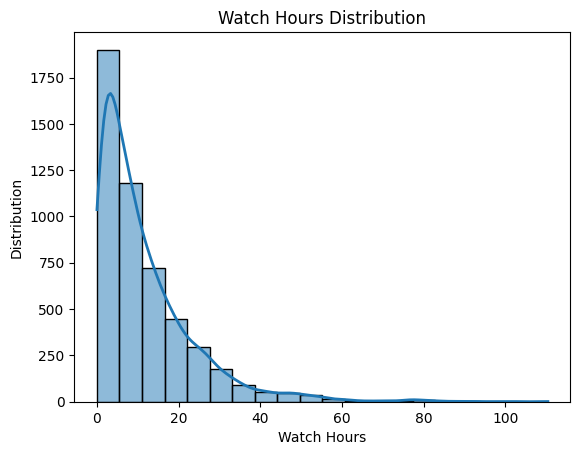

In [33]:
sns.histplot(df['watch_hours'],bins=20,kde=True,line_kws={"color":"Red","linewidth":2})
plt.title("Watch Hours Distribution")
plt.xlabel("Watch Hours")
plt.ylabel("Distribution")
plt.show()

In [34]:
# Checking that the low watch-hour users churn more

In [35]:
df['watch_group'] = pd.qcut(df['watch_hours'],q=4,labels=["Low","Medium","High","Very High"])

In [36]:
(df.groupby("watch_group")["churned"].mean()*100).round(2)

watch_group
Low          85.60
Medium       58.91
High         43.60
Very High    13.05
Name: churned, dtype: float64

<Axes: ylabel='watch_group'>

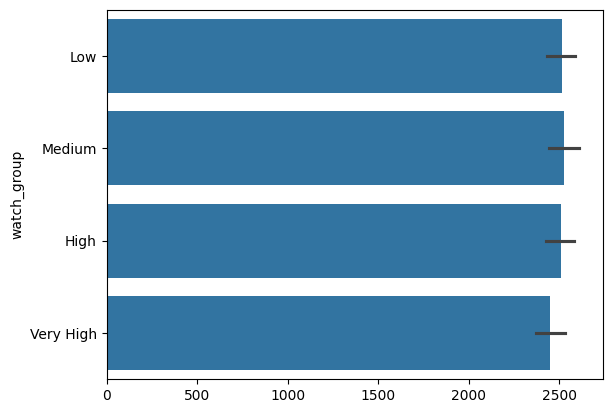

In [37]:
sns.barplot(df['watch_group'])

In [38]:
# Checking that How does avg_watch_time_per_day relate to churn

In [39]:
df.groupby('avg_watch_time_per_day')['churned'].mean()

avg_watch_time_per_day
0.00     0.923077
0.01     0.938462
0.02     0.953846
0.03     0.949580
0.04     0.933333
           ...   
32.81    0.000000
32.88    0.000000
34.53    0.000000
52.80    0.000000
98.42    0.000000
Name: churned, Length: 505, dtype: float64

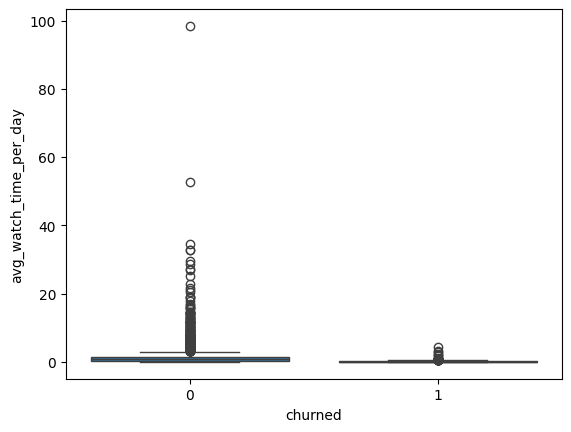

In [40]:
sns.boxplot(x="churned",y="avg_watch_time_per_day",data=df)
plt.show()

In [41]:
# Checking that the highly active users churn less

In [42]:
df['active_user'] = df['watch_hours'] > df['watch_hours'].median()

In [43]:
(df.groupby("active_user")["watch_hours"].mean()*100).round(2)

active_user
False     355.03
True     1975.51
Name: watch_hours, dtype: float64

In [44]:
# Checking that Which subscription type (Basic/Standard/Premium) has the highest churn

In [45]:
df.groupby('subscription_type')['churned'].mean()*100

subscription_type
Basic       61.830223
Premium     43.709392
Standard    45.443499
Name: churned, dtype: float64

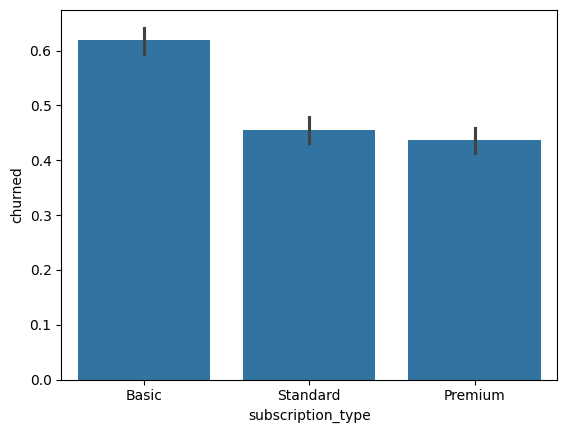

In [46]:
sns.barplot(x='subscription_type',y='churned',data=df)
plt.show()

In [47]:
# Checking that Does higher monthly_fee reduce churn

In [48]:
(df.groupby('churned')['monthly_fee'].mean()*100).round(2)

churned
0    1424.84
1    1312.52
Name: monthly_fee, dtype: float64

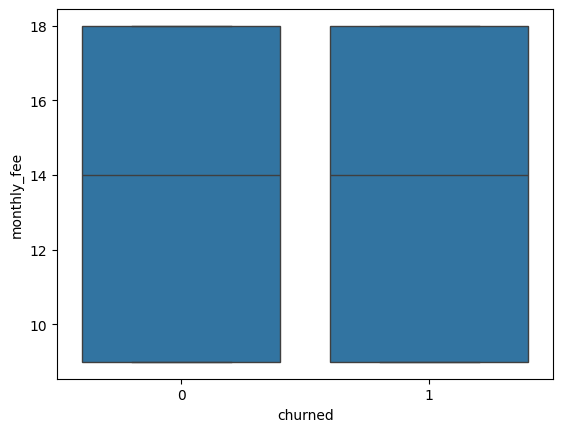

In [49]:
sns.boxplot(x='churned',y='monthly_fee',data=df)
plt.show()

In [50]:
# Checking that Which payment method is associated with higher churn

In [51]:
(df.groupby('payment_method')['churned'].mean()*100).round(2)

payment_method
Credit Card    43.58
Crypto         59.70
Debit Card     43.69
Gift Card      57.79
PayPal         47.08
Name: churned, dtype: float64

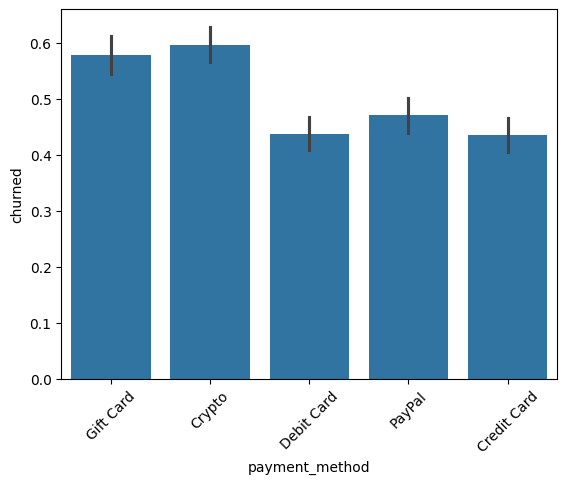

In [52]:
sns.barplot(x="payment_method", y="churned", data=df)
plt.xticks(rotation=45)
plt.show()

In [53]:
# Checking that Are users with more profiles less likely to churn

In [54]:
(df.groupby('number_of_profiles')['churned'].mean()*100).round(2)

number_of_profiles
1    58.64
2    57.44
3    57.85
4    37.54
5    40.62
Name: churned, dtype: float64

<Axes: xlabel='churned', ylabel='number_of_profiles'>

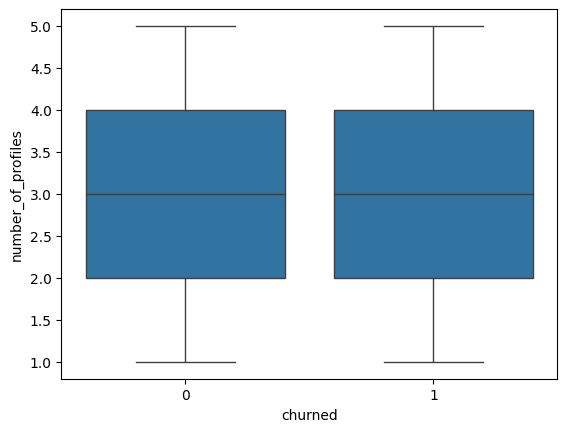

In [55]:
sns.boxplot(x='churned',y='number_of_profiles',data=df)

In [56]:
#checking that Which device type (TV/Mobile/etc.) is most used

In [57]:
df['device'].value_counts()

device
Tablet     1048
Laptop     1006
Mobile     1004
TV          993
Desktop     949
Name: count, dtype: int64

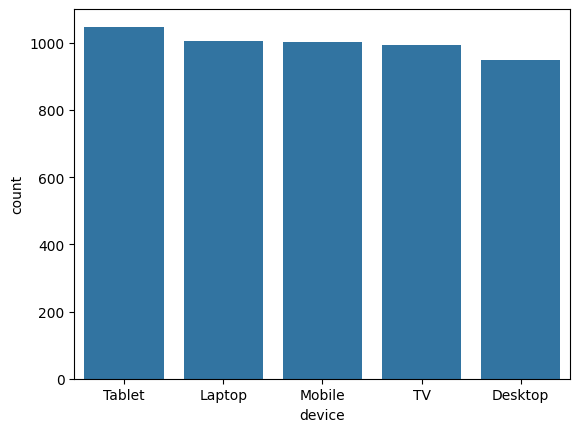

In [58]:
sns.barplot(df['device'].value_counts())
plt.show()

In [59]:
# Checking that the mobile users churn more than TV users

In [60]:
device_churn = df.groupby("device")["churned"].mean()
print(device_churn)

device
Desktop    0.492097
Laptop     0.517893
Mobile     0.504980
TV         0.499496
Tablet     0.500000
Name: churned, dtype: float64


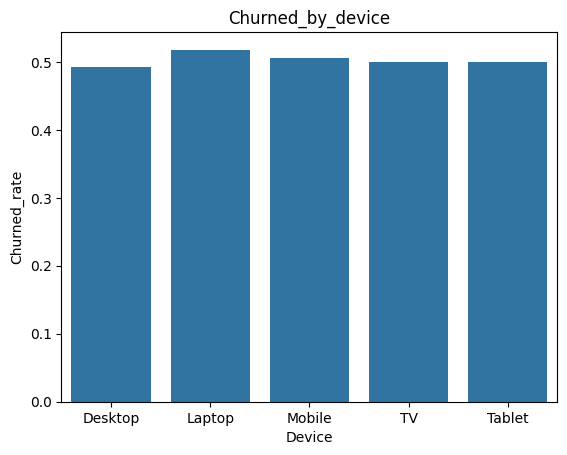

In [61]:
sns.barplot(device_churn)
plt.title("Churned_by_device")
plt.xlabel("Device")
plt.ylabel("Churned_rate")
plt.show()

In [62]:
# Checking is there a relationship between device and watch time

In [63]:
df.groupby('device')['watch_hours'].mean()

device
Desktop    12.382603
Laptop     11.273400
Mobile     11.961116
TV         11.883202
Tablet     10.826469
Name: watch_hours, dtype: float64

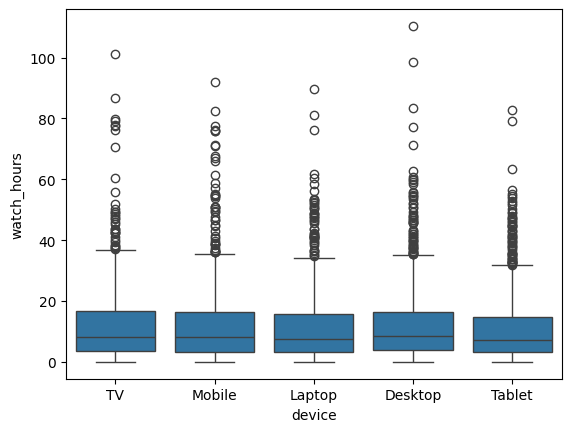

In [64]:
sns.boxplot(x='device',y='watch_hours',data=df)
plt.show()

In [65]:
# Checking Which favorite genres are most popular

In [66]:
genre_count = df['favorite_genre'].value_counts()
print(genre_count)

favorite_genre
Drama          731
Documentary    729
Romance        725
Sci-Fi         720
Horror         713
Action         697
Comedy         685
Name: count, dtype: int64


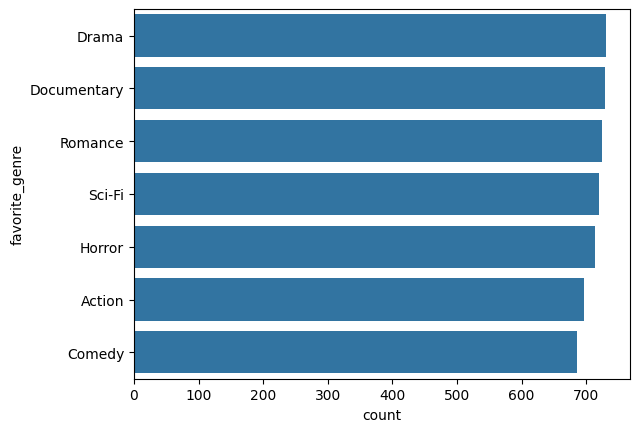

In [67]:
sns.barplot(genre_count,orient='h')
plt.show()

In [68]:
# Checking the certain genre preferences correlate with churn

In [69]:
(df.groupby('favorite_genre')['churned'].mean()*100).round(2)

favorite_genre
Action         52.37
Comedy         49.93
Documentary    50.75
Drama          52.26
Horror         51.47
Romance        48.28
Sci-Fi         47.08
Name: churned, dtype: float64

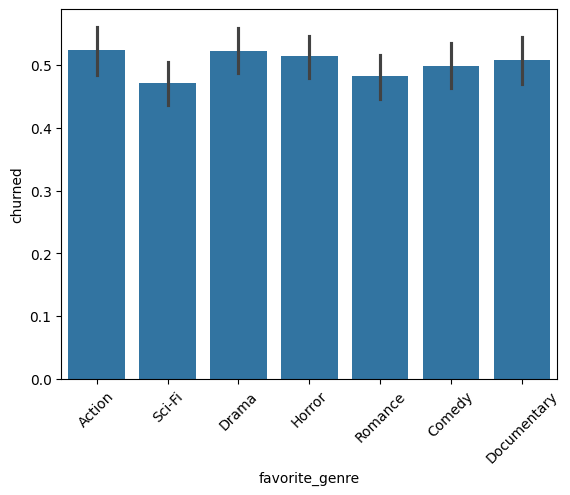

In [70]:
sns.barplot(x='favorite_genre',y='churned',data=df)
plt.xticks(rotation=45)
plt.show()

In [71]:
# Checking that there are action or drama lovers more loyal

In [72]:
action_drama = df[df['favorite_genre'].isin(['Action','Drama'])]

In [73]:
action_drama.groupby('favorite_genre')['churned'].mean()

favorite_genre
Action    0.523673
Drama     0.522572
Name: churned, dtype: float64

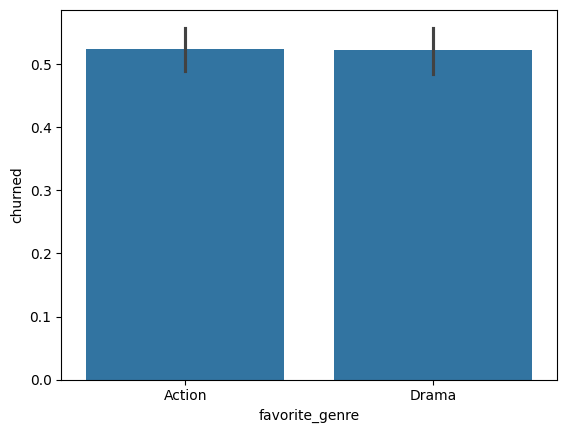

In [74]:
sns.barplot(x='favorite_genre',y='churned',data=action_drama)
plt.show()

In [75]:
# Checking that how does last_login_days impact churn

In [76]:
df.groupby('churned')['last_login_days'].mean()

churned
0    21.771026
1    38.309344
Name: last_login_days, dtype: float64

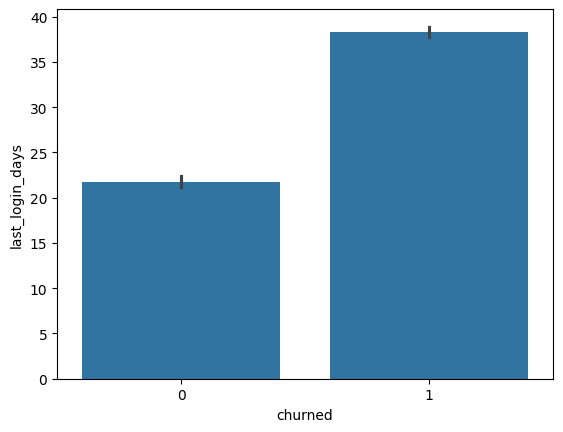

In [77]:
sns.barplot(x='churned',y='last_login_days',data=df)
plt.show()

In [78]:
#Checking that, Do inactive users churn more

In [79]:
df['inactive_user'] = df['last_login_days']>30

In [80]:
df.groupby('inactive_user')['churned'].mean()

inactive_user
False    0.261162
True     0.750911
Name: churned, dtype: float64

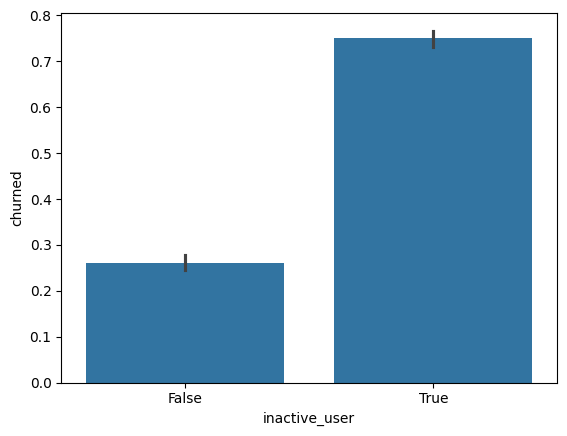

In [81]:
sns.barplot(x='inactive_user',y='churned',data=df)
plt.show()

In [82]:
# Checking is there a threshold of inactivity where churn spikes

In [83]:
# Create bins for inactivity
bins = [0, 7, 14, 30, 60, 90, 180]
labels = ["0-7", "8-14", "15-30", "31-60", "61-90", "90+"]
df["login_bins"] = pd.cut(df["last_login_days"], bins=bins, labels=labels)

In [84]:
# Churn rate by inactivity bins
bin_churn = (df.groupby("login_bins")["churned"].mean())
print(bin_churn)

login_bins
0-7      0.147627
8-14     0.270125
15-30    0.319970
31-60    0.750911
61-90         NaN
90+           NaN
Name: churned, dtype: float64


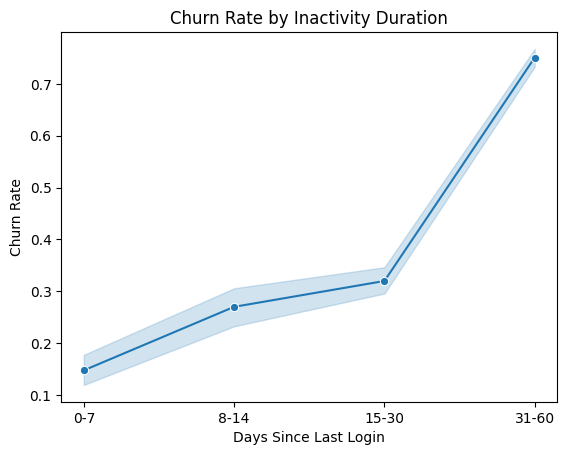

In [85]:
# Visualization
sns.lineplot(data=df, x="login_bins", y="churned", marker="o")
plt.title("Churn Rate by Inactivity Duration")
plt.xlabel("Days Since Last Login")
plt.ylabel("Churn Rate")
plt.show()

In [86]:
# Checking Which features are highly correlated with churn

In [87]:
# Select numerical columns
num_cols = df.select_dtypes(include=["int64", "float64"])

In [88]:
# Correlation matrix
corr = num_cols.corr()

In [89]:
# Correlation with churn
churn_corr = corr["churned"].sort_values(ascending=False)
print(churn_corr)

churned                   1.000000
last_login_days           0.471590
age                      -0.003515
monthly_fee              -0.152117
number_of_profiles       -0.158614
avg_watch_time_per_day   -0.272958
watch_hours              -0.479916
Name: churned, dtype: float64


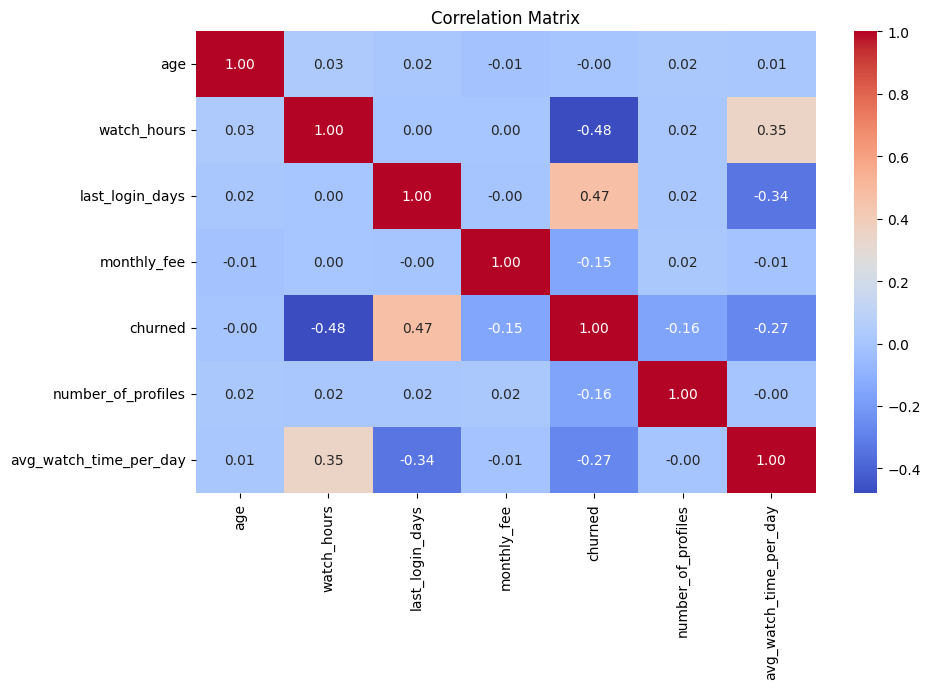

In [90]:
# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [91]:
# Checking that Is there a relationship between watch hours and subscription type

In [92]:
df.groupby('subscription_type')['watch_hours'].mean()

subscription_type
Basic       11.563528
Premium     11.706486
Standard    11.677491
Name: watch_hours, dtype: float64

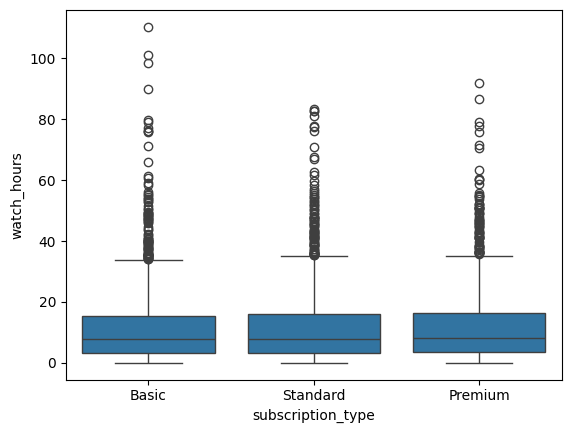

In [96]:
sns.boxplot(x='subscription_type',y='watch_hours',data=df)
plt.show()

In [ ]:
# Checking does age correlate with watch time

In [98]:
df['age'].corr(df['watch_hours'])

0.03153931091114701

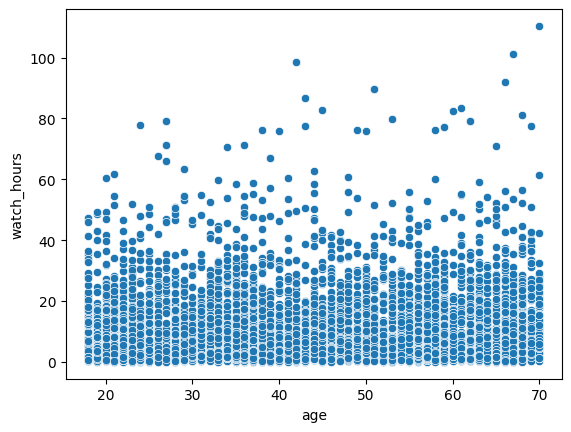

In [100]:
sns.scatterplot(x='age',y='watch_hours',data=df)
plt.show()